# Xtra Ki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import folium
import time, re
from tqdm import tqdm_notebook as tqdmn

from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementNotInteractableException, ElementClickInterceptedException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [99]:
df = pd.read_csv('df_sup.csv', usecols=['title','street','number']).head(50)

In [100]:
df.loc[df['title'] == 'Anton Solé', 'title'] = 'Taller Anton Solé'
df['title'] = df['title'].str.replace('F.Espunes','Talleres Espuña')
df.loc[df['title'] == 'Herpa', 'title'] = 'Erpa'
df.loc[df['title'] == 'Emauto S.C', 'number'] = '40'
df.loc[df['title'] == 'Emauto S.C', 'title'] = 'Em Auto S.C.'
df.loc[df['title'] == 'Findal', 'number'] = '128' 
df.loc[df['title'] == 'Findal', 'street'] = 'CL PUIG CERDÁ'
df.loc[df['title'] == 'Tallers Ulibarri', 'title'] = 'Talleres Chicote'

In [101]:
df['street'] = df['street'].str.replace('CL','Carrer')
df['street'] = df['street'].str.replace('PZ','Plaça')
df['street'] = df['street'].str.replace('PS','Passeig')

df['serch_o'] = df['title']+' '+df['street']+', '+df['number']

In [102]:
df

,title,number,street,serch_o
0,Garces Taller,78,Carrer ROCAFORT,"Garces Taller Carrer ROCAFORT, 78"
1,Taller Anton Solé,10,Plaça NAVAS,"Taller Anton Solé Plaça NAVAS, 10"
2,Auto.Carburación,1,Carrer TEODOR BONAPLATA,"Auto.Carburación Carrer TEODOR BONAPLATA, 1"
3,"M.F, Flomart",30,Passeig MONTJUIC,"M.F, Flomart Passeig MONTJUIC, 30"
4,Talleres Espuña,68,Passeig MONTJUIC,"Talleres Espuña Passeig MONTJUIC, 68"
5,Talleres Herpa,18,Carrer CABANES,"Talleres Herpa Carrer CABANES, 18"
6,Talleres S.M,35,Carrer PIQUER,"Talleres S.M Carrer PIQUER, 35"
7,Tallers Fontrodona,50,Carrer PIQUER,"Tallers Fontrodona Carrer PIQUER, 50"
8,Electric-Moto Andrés,5,Carrer LAFONT,"Electric-Moto Andrés Carrer LAFONT, 5"
9,Erpa,46,Carrer VILA I VILA,"Erpa Carrer VILA I VILA, 46"


In [35]:
options = webdriver.ChromeOptions()

options.add_argument('headless')

browser = webdriver.Chrome(options=options)

starting_business = df['serch_o']

full_name = []
rating = []
total_ratings = []
business_cat = []
address = []
phone = []
website = []
lat = []
long = []

for business in tqdmn(starting_business, leave=False, desc='1. Extrayendo los datos') :
    
    # URL making :
    url = 'https://www.google.com/maps/search/' + business
    browser.get(url)
    # Waiting for the name of the business to load and be visible. If it fails, skip to next business in competition list :
    try :
        WebDriverWait(browser,10).until(EC.visibility_of_element_located((By.CLASS_NAME, "section-hero-header-title-title")))
    except (NoSuchElementException, TimeoutException) as e :
        continue
    
        # Extracting the data and putting it into the empty lists we defined earlier :
    try:
        full_name.append(browser.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[1]').text)
    except NoSuchElementException :
        full_name.append(np.nan)

    try:
        rating.append(browser.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[2]/div/div[1]/span[1]/span/span').text)
    except NoSuchElementException :
        rating.append(np.nan)

    try:
        total_ratings.append(browser.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[2]/div/div[1]/span[2]/span/span[1]/span[2]/span[1]/button').text)
    except NoSuchElementException:
        total_ratings.append(np.nan)

    try:
        business_cat.append(browser.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[2]/div/div[2]/span[1]/span[1]/button').text)
    except NoSuchElementException:
        business_cat.append(np.nan)
    
    try:#falla
        address.append(browser.find_element_by_css_selector('div[data-tooltip="Copiar la dirección"]').text)
    except NoSuchElementException :
        address.append(np.nan)
    
    try:
        phone.append(browser.find_element_by_css_selector('div[data-tooltip="Copiar el número de teléfono"]').text)
    except NoSuchElementException :
        phone.append(np.nan)

    try:
        website.append(browser.find_element_by_css_selector('div[data-tooltip="Abrir el sitio web"]').text)
    except NoSuchElementException :
        website.append(np.nan)
    
    try:
        coordinates = browser.find_element_by_css_selector('meta[itemprop=image]').get_attribute('content')
        coordinates = coordinates.split('?center=')[1].split('&zoom=')[0].split('%2C')
        lat.append(coordinates[0])
        long.append(coordinates[1])
    except NoSuchElementException:
        lat.append(np.nan)
        long.append(np.nan)
# Closing the Chrome window
browser.close()

In [36]:
PS = pd.DataFrame(data={'full_name':full_name, 'rating':rating, 'total_ratings':total_ratings, 'business_category':business_cat, 'address':address, 'phone':phone, 'website':website, 'latitude':lat, 'longitude':long})

In [37]:
PS

,full_name,rating,total_ratings,business_category,address,phone,website,latitude,longitude
0,Tallers Garcés,4.1,(10),Taller de automóviles,"Carrer de Rocafort, 78, 08015 Barcelona",934 23 10 93,NaN,41.3793706,2.1537536
1,Taller Antón Solé,NaN,NaN,,"Plaça de las Navas, 10, 08004 Barcelona",934 23 45 63,NaN,41.3740345,2.1587754
2,Auto Carburacion e Inyeccion,5.0,(2),Taller de reparación de vehículos todoterreno,"C/ d'Entença, 20, 08015 Barcelona",933 25 46 94,NaN,41.3760141,2.1556153
3,MF Flomart,4.9,(35),Tienda de repuestos para automóviles,"Passeig de Montjuïc, 30, 08004 Barcelona",934 41 13 48,NaN,41.372421,2.17151
4,Talleres Espuña,4.6,(10),Taller de reparación de automóviles,"Passeig de Montjuïc, 68, 08004 Barcelona",934 41 48 10,NaN,41.3717558,2.167712
5,Talleres Herpa,NaN,NaN,Taller de reparación de automóviles,"Carrer de Cabanes, 18, 08004 Barcelona",NaN,NaN,41.3739523,2.1703705
6,Tallers Sm S C P,4.7,(3),Taller de reparación de automóviles,"Carrer de Piquer, 35, 08004 Barcelona",933 29 50 49,NaN,41.3731446,2.1691423
7,Talleres Fontrodona,4.8,(8),Taller de reparación de automóviles,"Carrer de Piquer, 50, 08004 Barcelona",933 29 45 48,NaN,41.373666,2.167859
8,Electric Moto Andrés,NaN,NaN,NaN,"Carrer de Lafont, 5, 08004 Barcelona",NaN,NaN,41.3736583,2.1693935
9,Servicio Eléctrico Erpa,5.0,(2),Taller de reparación de automóviles,"Carrer de Vila i Vilà, 46, 08004 Barcelona",934 41 30 39,NaN,41.3738642,2.1702844


In [ ]:
PS.to_csv('print_shops_test.csv', index=False)

In [ ]:
PS = pd.read_csv('print_shops_test.csv')

---

In [103]:
options = webdriver.ChromeOptions()

options.add_argument('headless')

browser = webdriver.Chrome(options=options)

landmarks = df['serch_o']# PS.full_name+' '+PS.address


# We want to remove any '/' character in the names and addresses in the landmarks list (because they'll break URLs) :
landmarks = [i.replace('/', ' ') for i in landmarks]

# These are the empty lists we will populate with the extracted data :
full_name = []
rating = []
total_ratings = []
landmark_cat = []
description = []
address = []
phone = []
website = []
hours = []
lat = []
long = []
    
# Here's the big loop iterating over the landmarks list :
for landmark in tqdmn(landmarks, leave=False, desc='1. Extracting the data') :
    
    # URL making :
    url = 'https://www.google.com/maps/search/' + landmark
    browser.get(url)

    # Waiting for the name of the landmark to load and be visible. If it fails, skip to next one :
    try :
        WebDriverWait(browser,10).until(EC.visibility_of_element_located((By.CLASS_NAME, "section-hero-header-title-title")))
    except (NoSuchElementException, TimeoutException) as e :
        continue
        
    # Extracting the data and putting it into the empty lists we defined earlier :
    try:
        full_name.append(browser.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[1]').text)
    except NoSuchElementException :
        full_name.append(np.nan)

    try:
        rating.append(browser.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[2]/div/div[1]/span[1]/span/span').text)
    except NoSuchElementException :
        rating.append(np.nan)

    try:
        total_ratings.append(browser.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[2]/div/div[1]/span[2]/span/span[1]/span[2]/span[1]/button').text)
    except NoSuchElementException:
        total_ratings.append(np.nan)

    try:
        landmark_cat.append(browser.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[2]/div/div[2]/span[1]/span[1]/button').text)
    except NoSuchElementException:
        landmark_cat.append(np.nan)
    
    try:
        description.append(browser.find_element_by_css_selector('div[class=section-editorial-quote]').text)
    except NoSuchElementException:
        description.append(np.nan
                          )
    try:
        address.append(browser.find_element_by_css_selector('div[data-tooltip="Copiar la dirección"]').text)
    except NoSuchElementException :
        address.append(np.nan)
        
    try:
        phone.append(browser.find_element_by_css_selector('div[data-tooltip="Copiar el número de teléfono"]').text)
    except NoSuchElementException :
        phone.append(np.nan)

    try:
        website.append(browser.find_element_by_css_selector('div[data-tooltip="Abrir el sitio web"]').text)
    except NoSuchElementException :
        website.append(np.nan)

    # Here we capture the popular hours for all 7 days starting with Sunday :
    try:
        hours.append([i.get_attribute('aria-label') for i in browser.find_elements_by_xpath("//*[contains(@aria-label, '%')]")])
    except NoSuchElementException:
        hours.append(np.nan)
        
    try:
        coordinates = browser.find_element_by_css_selector('meta[itemprop=image]').get_attribute('content')
        coordinates = coordinates.split('?center=')[1].split('&zoom=')[0].split('%2C')
        lat.append(coordinates[0])
        long.append(coordinates[1])
    except NoSuchElementException:
        lat.append(np.nan)
        long.append(np.nan)

# Closing the Chrome window
browser.close()

In [104]:
HL = pd.DataFrame(data={'full_name':full_name, 'rating':rating, 'total_ratings':total_ratings, 'landmark_category':landmark_cat, 'description':description, 'address':address, 'phone':phone, 'website':website,'latitude':lat, 'longitude':long, 'hours':hours,})

In [105]:
HL

,full_name,rating,total_ratings,landmark_category,description,address,phone,website,latitude,longitude,hours
0,Tallers Garcés,4.1,(10),Taller de automóviles,NaN,"Carrer de Rocafort, 78, 08015 Barcelona",934 23 10 93,NaN,41.3793706,2.1537536,[]
1,Taller Antón Solé,NaN,NaN,,NaN,"Plaça de las Navas, 10, 08004 Barcelona",934 23 45 63,NaN,41.3740345,2.1587754,[]
2,Auto Carburacion e Inyeccion,5.0,(2),Taller de reparación de vehículos todoterreno,NaN,"C/ d'Entença, 20, 08015 Barcelona",,NaN,41.3760141,2.1556153,[]
3,MF Flomart,4.9,(35),Tienda de repuestos para automóviles,NaN,"Passeig de Montjuïc, 30, 08004 Barcelona",934 41 13 48,NaN,41.372421,2.17151,"[% concurrido a la(s) ., 0% concurrido a la(s)..."
4,Talleres Espuña,4.6,(10),Taller de reparación de automóviles,NaN,"Passeig de Montjuïc, 68, 08004 Barcelona",934 41 48 10,NaN,41.3717558,2.167712,[]
5,Talleres Herpa,NaN,NaN,Taller de reparación de automóviles,NaN,"Carrer de Cabanes, 18, 08004 Barcelona",NaN,NaN,41.3739523,2.1703705,[]
6,Tallers Sm S C P,4.7,(3),Taller de reparación de automóviles,NaN,"Carrer de Piquer, 35, 08004 Barcelona",933 29 50 49,NaN,41.3731446,2.1691423,[]
7,Talleres Fontrodona,4.8,(8),Taller de reparación de automóviles,NaN,"Carrer de Piquer, 50, 08004 Barcelona",933 29 45 48,NaN,41.373666,2.167859,[]
8,Electric Moto Andrés,NaN,NaN,NaN,NaN,"Carrer de Lafont, 5, 08004 Barcelona",NaN,NaN,41.3736583,2.1693935,[]
9,Servicio Eléctrico Erpa,5.0,(2),Taller de reparación de automóviles,NaN,"Carrer de Vila i Vilà, 46, 08004 Barcelona",934 41 30 39,NaN,41.3738642,2.1702844,[]


In [106]:
HL.shape

(34, 11)

In [ ]:
HL.to_csv('historical_landmarks.csv', index=False)

In [ ]:
HL = pd.read_csv('historical_landmarks.csv')

# Ordenar por ratings

In [21]:
HL.total_ratings = HL.total_ratings.replace('\(|\)|,', '', regex=True)
HL.total_ratings = HL.total_ratings.astype(float)

In [22]:
HL10 = HL.sort_values(by='total_ratings', ascending=False).copy()
HL10

,full_name,rating,total_ratings,landmark_category,description,address,hours
26,Midas,4.5,119.0,Taller de reparación de motos,NaN,"Carrer del Foc, 88, 08038 Barcelona",[]
22,Midas,4.2,105.0,Taller de reparación de motos,NaN,"Carrer de Còrsega, 691, 08026 Barcelona",[]
21,Midas,4.5,87.0,Taller de reparación de automóviles,NaN,"Passeig de Maragall, 237, 08032 Barcelona",[]
20,Midas,4.4,81.0,Taller de reparación de motos,NaN,"Carrer de la Marina, 97, 08018 Barcelona",[]
19,Rodi Motor Services,4.2,73.0,Taller mecánico,NaN,"Carrer de la Marina, 82, 08018 Barcelona","[% concurrido a la(s) ., 0% concurrido a la(s)..."
24,Midas,4.4,73.0,Taller de reparación de motos,NaN,"Av. de Sarrià, 14, 08029 Barcelona",[]
23,Midas,4.1,59.0,Taller de reparación de automóviles,NaN,"Avinguda de la República Argentina, 183, 08023...",[]
15,Motos Bartrina,4.4,55.0,Concesionario de motos,NaN,"Carrer de Campeny, 30, 08030 Barcelona","[% concurrido a la(s) ., 0% concurrido a la(s)..."
25,Midas,4.1,46.0,Taller de automóviles,NaN,"C, Via Augusta, 81, 08006 Barcelona",[]
3,MF Flomart,4.9,35.0,Tienda de repuestos para automóviles,NaN,"Passeig de Montjuïc, 30, 08004 Barcelona","[% concurrido a la(s) ., 0% concurrido a la(s)..."


In [23]:
(list(HL10[HL10.full_name == 'MF Flomart'].hours))

[['% concurrido a la(s) .',
  '0% concurrido a la(s) 06:00.',
  '0% concurrido a la(s) 07:00.',
  '0% concurrido a la(s) 08:00.',
  '35% concurrido a la(s) 09:00.',
  '25% concurrido a la(s) 10:00.',
  '30% concurrido a la(s) 11:00.',
  '100% concurrido a la(s) 12:00.',
  '15% concurrido a la(s) 13:00.',
  '0% concurrido a la(s) 14:00.',
  '25% concurrido a la(s) 15:00.',
  '55% concurrido a la(s) 16:00.',
  '70% concurrido a la(s) 17:00.',
  '50% concurrido a la(s) 18:00.',
  '25% concurrido a la(s) 19:00.',
  '0% concurrido a la(s) 20:00.',
  '0% concurrido a la(s) 21:00.',
  '0% concurrido a la(s) 22:00.',
  '0% concurrido a la(s) 23:00.',
  '0% concurrido a la(s) 06:00.',
  '0% concurrido a la(s) 07:00.',
  '0% concurrido a la(s) 08:00.',
  '35% concurrido a la(s) 09:00.',
  '60% concurrido a la(s) 10:00.',
  '70% concurrido a la(s) 11:00.',
  '60% concurrido a la(s) 12:00.',
  '35% concurrido a la(s) 13:00.',
  '0% concurrido a la(s) 14:00.',
  '5% concurrido a la(s) 15:00.',
  '5

In [65]:
def visit_planner(place_name) :

    # first we make an empty dataframe out of a list of days as index and a list of hours as columns :'Sunday', 
    place_name = pd.DataFrame(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], \
    #place_name = pd.DataFrame(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],  \
                              columns=['06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00',
                                       '21:00','22:00','23:00'])    
    
    # and then we return that dataframe
    return place_name

In [66]:
sup_mrk = visit_planner('Rodi Motor Services')
sup_mrk

,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Supermercados Jespac S.A. Supermercados Consum
re.findall('.{0,23}09:00', str(list(HL[HL.full_name=='Rodi Motor Services'].hours)))

['30% concurrido a la(s) 09:00',
 '26% concurrido a la(s) 09:00',
 '26% concurrido a la(s) 09:00',
 '43% concurrido a la(s) 09:00',
 '52% concurrido a la(s) 09:00',
 '39% concurrido a la(s) 09:00']

In [68]:
sup_mrk['10:00']

Monday       NaN
Tuesday      NaN
Wednesday    NaN
Thursday     NaN
Friday       NaN
Saturday     NaN
Name: 10:00, dtype: object

In [69]:
#sup_mrk['10'] = re.findall('.{0,29}hora: 10.{0,2}', str(list(HL[HL.full_name=='Rodi Motor Services'].hours)))
sup_mrk['10:00'] = re.findall('.{0,23}10:00', str(list(HL[HL.full_name=='Rodi Motor Services'].hours)))
sup_mrk['10:00'] = [ re.findall('\d+', str(i))[0] for i in sup_mrk['10:00'] ]
sup_mrk['10:00'] = sup_mrk['10:00'].astype(int)
sup_mrk

,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
Monday,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tuesday,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wednesday,NaN,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thursday,NaN,NaN,NaN,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Friday,NaN,NaN,NaN,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saturday,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
h = ['06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']
    
len(h)

18

In [71]:
for hour in range(0,18):
    print(h[hour])

06:00
07:00
08:00
09:00
10:00
11:00
12:00
13:00
14:00
15:00
16:00
17:00
18:00
19:00
20:00
21:00
22:00
23:00


In [72]:
for h_our in range(18):
    print(re.findall('.{0,23}'+h[h_our]+'..', str(list(HL[HL.full_name=='Rodi Motor Services'].hours))))

["'0% concurrido a la(s) 06:00.'", "'0% concurrido a la(s) 06:00.'", "'0% concurrido a la(s) 06:00.'", "'0% concurrido a la(s) 06:00.'", "'0% concurrido a la(s) 06:00.'", "'0% concurrido a la(s) 06:00.'"]
["'0% concurrido a la(s) 07:00.'", "'0% concurrido a la(s) 07:00.'", "'0% concurrido a la(s) 07:00.'", "'0% concurrido a la(s) 07:00.'", "'0% concurrido a la(s) 07:00.'", "'0% concurrido a la(s) 07:00.'"]
["17% concurrido a la(s) 08:00.'", "'4% concurrido a la(s) 08:00.'", "'8% concurrido a la(s) 08:00.'", "26% concurrido a la(s) 08:00.'", "30% concurrido a la(s) 08:00.'", "'0% concurrido a la(s) 08:00.'"]
["30% concurrido a la(s) 09:00.'", "26% concurrido a la(s) 09:00.'", "26% concurrido a la(s) 09:00.'", "43% concurrido a la(s) 09:00.'", "52% concurrido a la(s) 09:00.'", "39% concurrido a la(s) 09:00.'"]
["34% concurrido a la(s) 10:00.'", "60% concurrido a la(s) 10:00.'", "43% concurrido a la(s) 10:00.'", "56% concurrido a la(s) 10:00.'", "65% concurrido a la(s) 10:00.'", "73% conc

In [87]:
for hour in list(sup_mrk):
    sup_mrk[hour] = re.findall('.{0,24}'+hour+'..', str(list(HL[HL.full_name=='Rodi Motor Services'].hours)))
    #sup_mrk[hour] = re.findall('.{0,29}hora: '+str(hour)+'..', str(list(HL[HL.full_name=='Rodi Motor Services'].hours)))
    sup_mrk[hour] = [ re.findall('\d+', str(i))[0] for i in sup_mrk[hour] ]
    sup_mrk[hour] = sup_mrk[hour].astype(int)

In [88]:
sup_mrk

,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
Monday,0,0,17,30,34,34,26,17,0,26,60,100,100,60,0,0,0,0
Tuesday,0,0,4,26,60,95,91,52,0,39,65,82,73,47,0,0,0,0
Wednesday,0,0,8,26,43,52,47,30,0,21,47,82,82,43,0,0,0,0
Thursday,0,0,26,43,56,56,47,30,0,26,56,91,95,65,0,0,0,0
Friday,0,0,30,52,65,65,47,26,0,17,52,100,95,43,0,0,0,0
Saturday,0,0,0,39,73,82,56,26,0,0,0,0,0,0,0,0,0,0


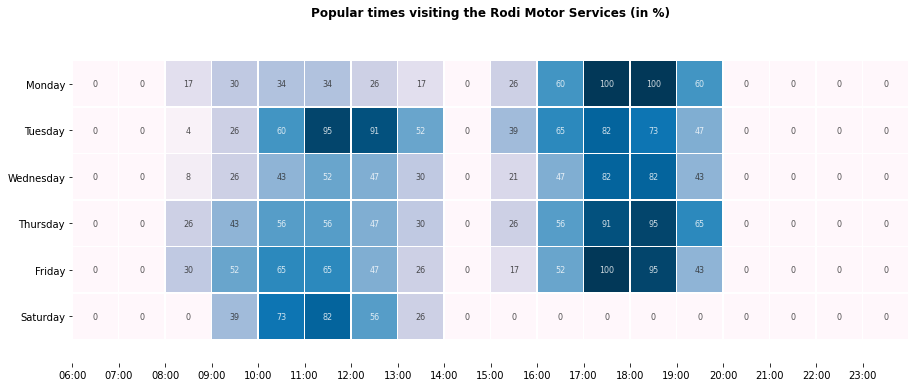

In [89]:
plt.figure(figsize=(15,7))
sns.heatmap(sup_mrk, cmap='PuBu', linewidths=0.8, annot=True, annot_kws={'fontsize':8, 'alpha':0.8}, fmt='d', square=True,
           cbar=False)

plt.xticks(np.arange(18), list(sup_mrk))
plt.title('Popular times visiting the Rodi Motor Services (in %)\n', weight='semibold')

# this bit of code ensures the heatmap will not show up truncated with some versions of matplotlib
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t);

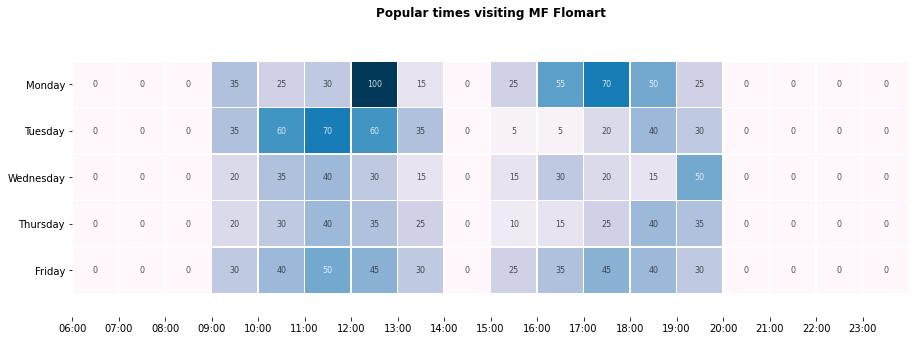

In [86]:
tall2 = visit_planner("Vatican Museums")

# we need to remove the row for Sunday before proceeding
tall2.drop('Saturday', axis=0, inplace=True)

for hour in list(tall2):
    tall2[hour] = re.findall('.{0,24}'+hour+'..', str(list(HL[HL.full_name=='MF Flomart'].hours)))
    tall2[hour] = [ re.findall('\d+', str(i))[0] for i in tall2[hour] ]
    tall2[hour] = tall2[hour].astype(int)

plt.figure(figsize=(15,7))
sns.heatmap(tall2, cmap='PuBu', linewidths=0.8, annot=True, annot_kws={'fontsize':8, 'alpha':0.8}, fmt='d', square=True,
           cbar=False)

plt.xticks(np.arange(18), list(tall2))
plt.title("Popular times visiting MF Flomart\n", weight='semibold')

# this bit of code ensures the heatmap will not show up truncated with some versions of matplotlib
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t);

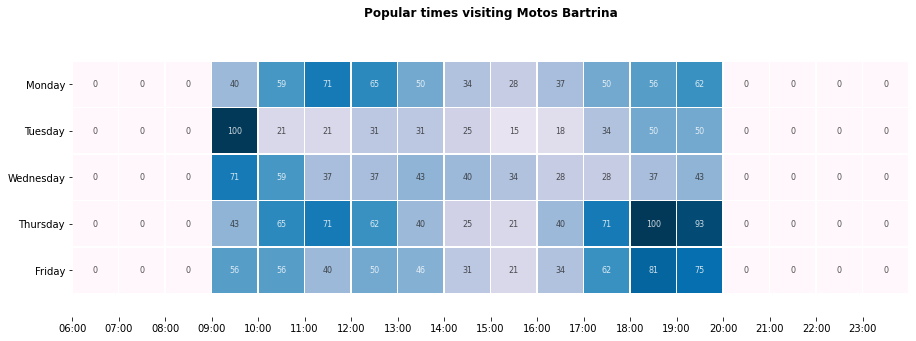

In [90]:
tall3 = visit_planner("Motos Bartrina")

# we need to remove the row for Sunday before proceeding
tall3.drop('Saturday', axis=0, inplace=True)

for hour in list(tall2):
    tall3[hour] = re.findall('.{0,24}'+hour+'..', str(list(HL[HL.full_name=='Motos Bartrina'].hours)))
    tall3[hour] = [ re.findall('\d+', str(i))[0] for i in tall3[hour] ]
    tall3[hour] = tall3[hour].astype(int)

plt.figure(figsize=(15,7))
sns.heatmap(tall3, cmap='PuBu', linewidths=0.8, annot=True, annot_kws={'fontsize':8, 'alpha':0.8}, fmt='d', square=True,
           cbar=False)

plt.xticks(np.arange(18), list(sup_mrk))
plt.title("Popular times visiting Motos Bartrina\n", weight='semibold')

# this bit of code ensures the heatmap will not show up truncated with some versions of matplotlib
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t);

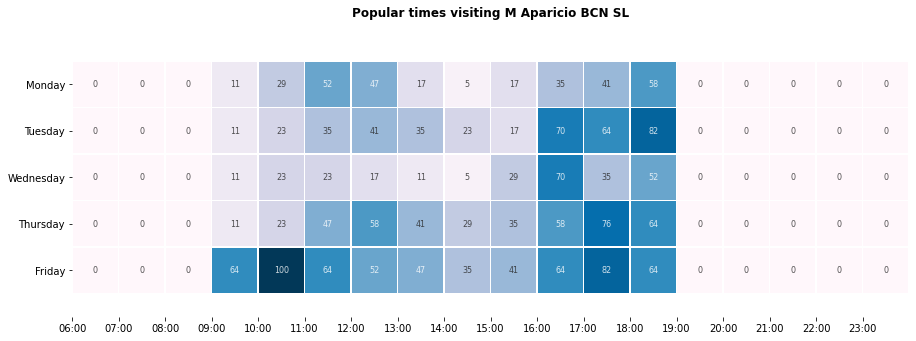

In [91]:
tall4 = visit_planner("M Aparicio BCN SL")

# we need to remove the row for Sunday before proceeding
tall4.drop('Saturday', axis=0, inplace=True)

for hour in list(tall4):
    tall4[hour] = re.findall('.{0,24}'+hour+'..', str(list(HL[HL.full_name=='M Aparicio BCN SL'].hours)))
    tall4[hour] = [ re.findall('\d+', str(i))[0] for i in tall4[hour] ]
    tall4[hour] = tall4[hour].astype(int)

plt.figure(figsize=(15,7))
sns.heatmap(tall4, cmap='PuBu', linewidths=0.8, annot=True, annot_kws={'fontsize':8, 'alpha':0.8}, fmt='d', square=True,
           cbar=False)

plt.xticks(np.arange(18), list(tall4))
plt.title("Popular times visiting M Aparicio BCN SL\n", weight='semibold')

# this bit of code ensures the heatmap will not show up truncated with some versions of matplotlib
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t);

In [ ]:
sup_mrk.describe()